# Project 1 - Word Cloud
## Text mining - Outum 2021
---
### Student: Miguel Angel Solis Orozco
### Profesor: Dra. Mildreth Isadora Alcaraz Mejía
#### September 6 2021
___

* Objective: To create a cloud of words from a text.
* Text: Calista chapter 1
* Language: Spanish

In [1]:
# libraries needed
import re
import nltk.data
from nltk.tokenize import sent_tokenize, RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.probability import FreqDist
import itertools
import string
from collections import defaultdict
import inflect
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from PIL import Image
from os import path
import os

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Introduction
I have decided to use for the project the first chapter of a novel I'm currently writing. I have decided to use the first chapter of the novel since it is 100% complete. 

# Goal
In this project I want to understand the frecuency of the words used. This is important because a writer is always looking for their filler words which, if not identified, can contribute to a boring experience for the reader.

# Calista
Calista is the code name of mi first novel. I'm currently in the 40% of the total progress of the writing phase. It is a story about a girl named Calista who has an emerging synthpop band. Her life has been perfect since she remembers. This gives her an existential crysis and will do anything to follow the path of self dstruction. Things get worse when she knows Ivan, an average man that loves her. What kind of relationship will come out when the only way Calista can love is by hurting her loved ones? 

# Phase 1 - Text exploration (tokenization)
The first phase consists in the exploration of the text file, and it's objective is to understand the text and get some introductory information from it.

The following is the raw content in the text.

In [3]:
with open('Calista1.txt') as doc:
    calista = doc.read()

print(calista)

I

4 de Diciembre

Amor es la palabra más grande del vocabulario. Atribuimos al amor los actos más humanos, al mismo tiempo que la culpamos por las acciones más atroces. Cualquier persona puede salvar una vida por amor, o quitarla por la misma razón. Amor es querer, pero también amar. Es autoestima e independencia, pero no necesariamente ambas.

El amor no ayuda a distinguir la diferencia en una historia. Podríamos leer un libro sobre cómo un rey sacrifica y mutila a ejércitos enteros, pero, si esto tiene como fin estar junto a su amada, todo el daño parece estar justificado. De la misma manera podemos ver cómo un monje budista toma una flor pisoteada, la planta en una maceta, la riega y le habla con las palabras más enternecedoras hasta que esta sana y vuelve a florecer. Esto, al igual del caso del rey, también se considera amor, así como todo lo que se encuentra en medio.

El ser humano, a lo largo de su existencia, ha hiper etiquetado las cosas como una reacción natural de supervive

The text is composed of the chapter number, the chapter title, and the chapter content which is in prose. There are some dialogs in the chapter content. let's see how many dialogs the chapter has.

In [4]:
calista_sp = nltk.data.load('tokenizers/punkt/spanish.pickle')
calista_sp = calista_sp.tokenize(calista)
calista_sp

['I\n\n4 de Diciembre\n\nAmor es la palabra más grande del vocabulario.',
 'Atribuimos al amor los actos más humanos, al mismo tiempo que la culpamos por las acciones más atroces.',
 'Cualquier persona puede salvar una vida por amor, o quitarla por la misma razón.',
 'Amor es querer, pero también amar.',
 'Es autoestima e independencia, pero no necesariamente ambas.',
 'El amor no ayuda a distinguir la diferencia en una historia.',
 'Podríamos leer un libro sobre cómo un rey sacrifica y mutila a ejércitos enteros, pero, si esto tiene como fin estar junto a su amada, todo el daño parece estar justificado.',
 'De la misma manera podemos ver cómo un monje budista toma una flor pisoteada, la planta en una maceta, la riega y le habla con las palabras más enternecedoras hasta que esta sana y vuelve a florecer.',
 'Esto, al igual del caso del rey, también se considera amor, así como todo lo que se encuentra en medio.',
 'El ser humano, a lo largo de su existencia, ha hiper etiquetado las cosa

In [5]:
# Sentence count and dialog count
dialog = []
for token in calista_sp:
    if '-' in token:
        dialog.append(token)

print('Sentences: ' + str(len(calista_sp) - len(dialog))) # Considering sentence different from dialog.
print('Dialogs: ' + str(len(dialog)))

Sentences: 218
Dialogs: 7


7 dialogs and 218 sentences in Calista's chapter 1. Now it is time to eliminate the dashes in the dialog so all the sentences can be considered equally.

In [6]:
# Elimination of dashes
ndcalista = re.sub(r'\- ', '', calista)
print(ndcalista)

I

4 de Diciembre

Amor es la palabra más grande del vocabulario. Atribuimos al amor los actos más humanos, al mismo tiempo que la culpamos por las acciones más atroces. Cualquier persona puede salvar una vida por amor, o quitarla por la misma razón. Amor es querer, pero también amar. Es autoestima e independencia, pero no necesariamente ambas.

El amor no ayuda a distinguir la diferencia en una historia. Podríamos leer un libro sobre cómo un rey sacrifica y mutila a ejércitos enteros, pero, si esto tiene como fin estar junto a su amada, todo el daño parece estar justificado. De la misma manera podemos ver cómo un monje budista toma una flor pisoteada, la planta en una maceta, la riega y le habla con las palabras más enternecedoras hasta que esta sana y vuelve a florecer. Esto, al igual del caso del rey, también se considera amor, así como todo lo que se encuentra en medio.

El ser humano, a lo largo de su existencia, ha hiper etiquetado las cosas como una reacción natural de supervive

In [7]:
# looking for Calista's chapter one's sentence quantity.
len(calista_sp)

225

In [8]:
# looking for Calista's chapter one's character length.
calista_sp_w = list(itertools.chain.from_iterable(calista_sp))
print(len(calista_sp_w))

16601


In [9]:
# Tokenization by word
wtcalista = word_tokenize(ndcalista)
print(wtcalista)
len(wtcalista)

['I', '4', 'de', 'Diciembre', 'Amor', 'es', 'la', 'palabra', 'más', 'grande', 'del', 'vocabulario', '.', 'Atribuimos', 'al', 'amor', 'los', 'actos', 'más', 'humanos', ',', 'al', 'mismo', 'tiempo', 'que', 'la', 'culpamos', 'por', 'las', 'acciones', 'más', 'atroces', '.', 'Cualquier', 'persona', 'puede', 'salvar', 'una', 'vida', 'por', 'amor', ',', 'o', 'quitarla', 'por', 'la', 'misma', 'razón', '.', 'Amor', 'es', 'querer', ',', 'pero', 'también', 'amar', '.', 'Es', 'autoestima', 'e', 'independencia', ',', 'pero', 'no', 'necesariamente', 'ambas', '.', 'El', 'amor', 'no', 'ayuda', 'a', 'distinguir', 'la', 'diferencia', 'en', 'una', 'historia', '.', 'Podríamos', 'leer', 'un', 'libro', 'sobre', 'cómo', 'un', 'rey', 'sacrifica', 'y', 'mutila', 'a', 'ejércitos', 'enteros', ',', 'pero', ',', 'si', 'esto', 'tiene', 'como', 'fin', 'estar', 'junto', 'a', 'su', 'amada', ',', 'todo', 'el', 'daño', 'parece', 'estar', 'justificado', '.', 'De', 'la', 'misma', 'manera', 'podemos', 'ver', 'cómo', 'un', 

3361

### Some important information
* There is a total of 225 sentences in Calista's Chapter 1.
* 7 of them are dialogs
* There are 16585 characters in Calista's chapter one..
* There are 3361 words in Calista's chapter one. I'm prospecting a quantity of 20 chapters so if al champters have a similar length the novel will consist of aproximatelly 67,000 words. This fits well since the range of a novel is between 40,000 and 120,000 words.

# Phase 2 - Cleaning the text (Normalization)

In this phase we will look for different ways to normalize a text. It is important to understand that there are differences between spanish and englisgh for this matter. The text is written in spanish so the normalization will consider the specific needs for this language. The normalization processes to implement will be the following:
* Remove chapter number (roman number)
* Remove punctuation symbols.
* Lower-case every word.
* Change numbers for words. ie. 1 for 'uno'
* Remove stop words. 
* Check for synonims and homologate them in one word.
* Check for plural nouns and homologate them as singular.

### Step 1 - Remove champter number (roman number)

In [10]:
wtcalista.pop(0)

'I'

### Step 2 and step 3 - Remove punctuation symbols and lower-case all words

In [12]:
# Remove punctuation marks and lower every word.
x = re.compile('[%s]' % re.escape(string.punctuation))

print('[%s]' % re.escape(string.punctuation), '\n', string.punctuation)

npcalista = []
for token in wtcalista:
        new_token = re.sub('[\.]|[\"]|[\,]|[\¡]|[\!]|[\¿]|[\?]|[\«]|[\»]', '', token)
        new_token = new_token.lower()
        if not new_token == '':
            npcalista.append(new_token)
print(npcalista)
len(npcalista)

[!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~] 
 !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['4', 'de', 'diciembre', 'amor', 'es', 'la', 'palabra', 'más', 'grande', 'del', 'vocabulario', 'atribuimos', 'al', 'amor', 'los', 'actos', 'más', 'humanos', 'al', 'mismo', 'tiempo', 'que', 'la', 'culpamos', 'por', 'las', 'acciones', 'más', 'atroces', 'cualquier', 'persona', 'puede', 'salvar', 'una', 'vida', 'por', 'amor', 'o', 'quitarla', 'por', 'la', 'misma', 'razón', 'amor', 'es', 'querer', 'pero', 'también', 'amar', 'es', 'autoestima', 'e', 'independencia', 'pero', 'no', 'necesariamente', 'ambas', 'el', 'amor', 'no', 'ayuda', 'a', 'distinguir', 'la', 'diferencia', 'en', 'una', 'historia', 'podríamos', 'leer', 'un', 'libro', 'sobre', 'cómo', 'un', 'rey', 'sacrifica', 'y', 'mutila', 'a', 'ejércitos', 'enteros', 'pero', 'si', 'esto', 'tiene', 'como', 'fin', 'estar', 'junto', 'a', 'su', 'amada', 'todo', 'el', 'daño', 'parece', 'estar', 'justificado', 'de', 'la', 'misma', 'manera', 'podemos', 'ver', 'cómo', 'un', 'monje', 'budista', 'toma', 'una', 'flor', 'pisoteada', 'la', 'planta', 'en

3011

### Step 4 - Change numbers into words

In [13]:
import num2words

for i, word in enumerate(npcalista):
    if word.isnumeric():
        npcalista[i] = str(num2words.num2words(word, lang = 'es'))

print(npcalista)

['cuatro', 'de', 'diciembre', 'amor', 'es', 'la', 'palabra', 'más', 'grande', 'del', 'vocabulario', 'atribuimos', 'al', 'amor', 'los', 'actos', 'más', 'humanos', 'al', 'mismo', 'tiempo', 'que', 'la', 'culpamos', 'por', 'las', 'acciones', 'más', 'atroces', 'cualquier', 'persona', 'puede', 'salvar', 'una', 'vida', 'por', 'amor', 'o', 'quitarla', 'por', 'la', 'misma', 'razón', 'amor', 'es', 'querer', 'pero', 'también', 'amar', 'es', 'autoestima', 'e', 'independencia', 'pero', 'no', 'necesariamente', 'ambas', 'el', 'amor', 'no', 'ayuda', 'a', 'distinguir', 'la', 'diferencia', 'en', 'una', 'historia', 'podríamos', 'leer', 'un', 'libro', 'sobre', 'cómo', 'un', 'rey', 'sacrifica', 'y', 'mutila', 'a', 'ejércitos', 'enteros', 'pero', 'si', 'esto', 'tiene', 'como', 'fin', 'estar', 'junto', 'a', 'su', 'amada', 'todo', 'el', 'daño', 'parece', 'estar', 'justificado', 'de', 'la', 'misma', 'manera', 'podemos', 'ver', 'cómo', 'un', 'monje', 'budista', 'toma', 'una', 'flor', 'pisoteada', 'la', 'planta'

### Step 5 - Remove stop words

In [14]:
# Create the list of stop words in spanish
stops = set(stopwords.words('spanish'))

# Create the list of words outside the spanish stop words list 
nscalista = [token for token in npcalista if token not in stops]
    
print(nscalista)
len(nscalista)

['cuatro', 'diciembre', 'amor', 'palabra', 'grande', 'vocabulario', 'atribuimos', 'amor', 'actos', 'humanos', 'mismo', 'tiempo', 'culpamos', 'acciones', 'atroces', 'cualquier', 'persona', 'puede', 'salvar', 'vida', 'amor', 'quitarla', 'misma', 'razón', 'amor', 'querer', 'amar', 'autoestima', 'independencia', 'necesariamente', 'ambas', 'amor', 'ayuda', 'distinguir', 'diferencia', 'historia', 'podríamos', 'leer', 'libro', 'cómo', 'rey', 'sacrifica', 'mutila', 'ejércitos', 'enteros', 'si', 'fin', 'junto', 'amada', 'daño', 'parece', 'justificado', 'misma', 'manera', 'podemos', 'ver', 'cómo', 'monje', 'budista', 'toma', 'flor', 'pisoteada', 'planta', 'maceta', 'riega', 'habla', 'palabras', 'enternecedoras', 'sana', 'vuelve', 'florecer', 'igual', 'caso', 'rey', 'considera', 'amor', 'así', 'encuentra', 'medio', 'ser', 'humano', 'largo', 'existencia', 'hiper', 'etiquetado', 'cosas', 'reacción', 'natural', 'supervivencia', 'hacemos', 'división', 'especies', 'animales', 'elección', 'prenda', 've

1463

### Step 6 - Check for plural nouns and homologate them as singular.

### Step 7- Check for synonims and homologate them in one word.

# Phase 3 - Word Cloud (Vectorization)

In this phase the objective is tho create a frequence vector for creating the bar plot  and the word cloud of the most used words.

#### Step 1 - Frequency vector and bar plot

In [15]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = FreqDist(nscalista).most_common(20)

print(FreqDist(nscalista).items())

dict_items([('cuatro', 3), ('diciembre', 1), ('amor', 25), ('palabra', 4), ('grande', 1), ('vocabulario', 1), ('atribuimos', 1), ('actos', 1), ('humanos', 1), ('mismo', 6), ('tiempo', 1), ('culpamos', 1), ('acciones', 2), ('atroces', 1), ('cualquier', 4), ('persona', 4), ('puede', 3), ('salvar', 2), ('vida', 8), ('quitarla', 1), ('misma', 5), ('razón', 3), ('querer', 1), ('amar', 1), ('autoestima', 1), ('independencia', 1), ('necesariamente', 1), ('ambas', 1), ('ayuda', 1), ('distinguir', 1), ('diferencia', 2), ('historia', 2), ('podríamos', 2), ('leer', 1), ('libro', 2), ('cómo', 8), ('rey', 2), ('sacrifica', 1), ('mutila', 1), ('ejércitos', 1), ('enteros', 1), ('si', 20), ('fin', 2), ('junto', 1), ('amada', 1), ('daño', 1), ('parece', 1), ('justificado', 1), ('manera', 4), ('podemos', 2), ('ver', 5), ('monje', 1), ('budista', 1), ('toma', 1), ('flor', 1), ('pisoteada', 1), ('planta', 1), ('maceta', 1), ('riega', 1), ('habla', 1), ('palabras', 2), ('enternecedoras', 1), ('sana', 1), (

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'amor'),
  Text(1, 0, 'si'),
  Text(2, 0, 'oswaldo'),
  Text(3, 0, 'madre'),
  Text(4, 0, 'vez'),
  Text(5, 0, 'noche'),
  Text(6, 0, 'ser'),
  Text(7, 0, 'después'),
  Text(8, 0, 'solo'),
  Text(9, 0, 'día'),
  Text(10, 0, 'miedo'),
  Text(11, 0, 'vida'),
  Text(12, 0, 'cómo'),
  Text(13, 0, 'pues'),
  Text(14, 0, 'años'),
  Text(15, 0, 'decía'),
  Text(16, 0, 'siempre'),
  Text(17, 0, 'momento'),
  Text(18, 0, 'dos'),
  Text(19, 0, 'nunca')])

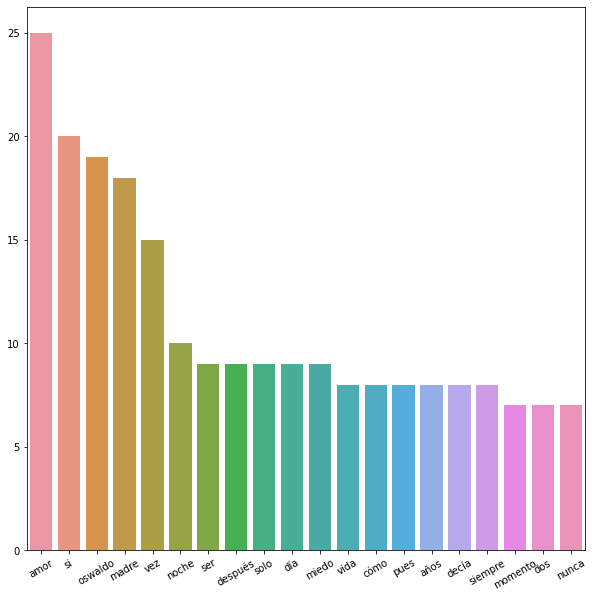

In [16]:
## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);
plt.show()

<Figure size 2160x1080 with 0 Axes>

(-0.5, 1056.5, 1919.5, -0.5)

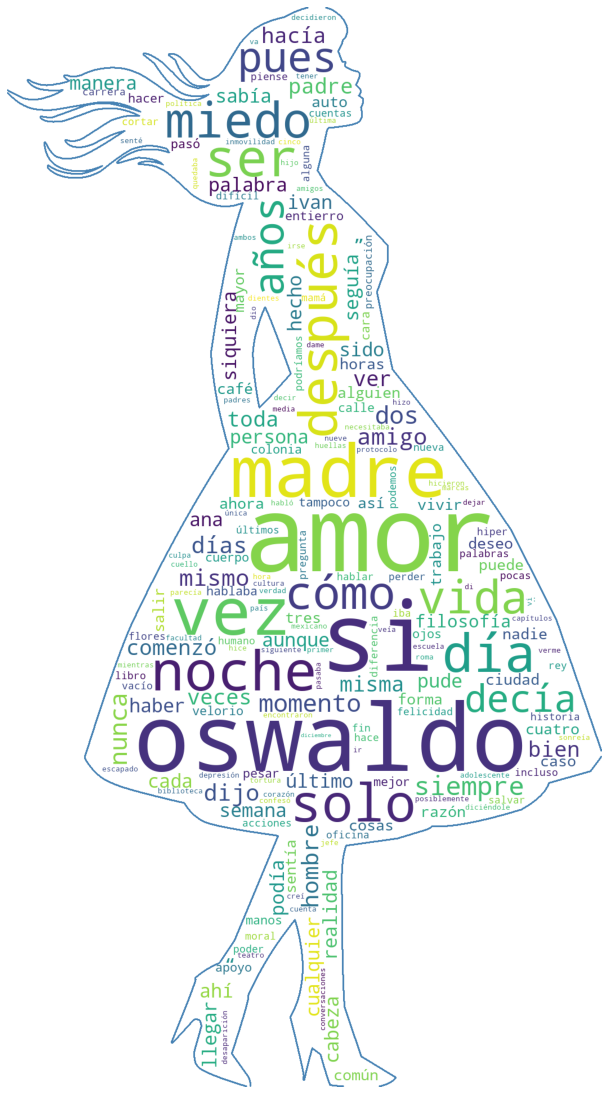

In [17]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# getting the mask for the word cloud shape
calista_mask = np.array(Image.open(os.path.join(d, "calista6.png")))

# generate word cloud
freq = FreqDist(nscalista)
wc = WordCloud(background_color="white", mask=calista_mask, contour_width=3, contour_color='steelblue').generate_from_frequencies(freq)

# store to file
wc.to_file(path.join(d, "word_cloud.png"))

# show
plt.figure( figsize=(30,15))
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Conclussions
The most used words are:
* Amor (25)
* Si (20)
* Oswaldo (19)
* Madre (18)
* Vez (15)
* Noche (10)

Each one of these words were used 10 times or more. 'Amor' is a very important word in Calista's Chapter one because the protagonist meditates about the mining of the word love. From mya point of view, 'Si' is a stop word, it can be removed in a future analysis. 'Oswaldo' is the friend of the main character and is the object of focus in this chapter, even thoug 19 times is a lot for a single chapter. 'Madre' is also used a lot in this chapter, there are some synonims that can be used to abvoid useless repetition of this word. 'Vez' is also over used in this chapter, this is a more complicated work to avoid since there are not so much synonims for that in particular. It is important to note that there could be ways to avoid this word changing the sentence structure and preserving the context. 'Noche' is not an important word in the context of the chapter. Although it is the least frequent word of the top list, it's meaning to the story is not so fundamental. It can be avoided depending on what its sentences are trying to communicate.

## Outcomes:

* The usage of 'Oswaldo' in the chapter should be reduced. It can be avoided using an alias for him, since his best friend is telling the story.
* 'Madre' can be repolaced by synonims.
* 'Vez' can be replaced with synonims or changes in the structure of its sentence.
* 'Noche' is the least important word in the context of the chapter, the evasion of this word will depend on each sentence context.